In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR

In [2]:
data=loadmat("ChemTrainNew.mat")

In [3]:
X=pd.DataFrame(data["XtrainDS"])
y=pd.DataFrame(data["YtrainDS"])

In [4]:
X=X.drop(X.columns[0],axis=1)
X

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
0,1128.45,79.625,391.7250,46.025,1418.25,1170.000,401.4000,32.725,1477.50,1192.0,...,21.0625,55.5275,32.9175,52.225,28.4200,51.1350,48.7375,50.7150,48.4750,29.8375
1,1128.45,80.425,393.5250,45.850,1360.50,1166.875,400.6125,33.225,1470.00,1189.0,...,21.0625,55.5275,33.4250,52.225,28.4200,51.1350,48.7375,50.7150,48.4750,29.3250
2,1128.45,80.200,391.5000,46.400,1394.25,1174.375,401.6250,33.225,1477.50,1196.0,...,21.0625,55.5275,33.4250,52.225,28.4200,51.1350,48.7375,50.7150,48.4750,29.3250
3,1128.20,80.025,396.0000,47.000,1419.75,1175.625,401.8500,33.225,1479.00,1180.0,...,21.0625,55.5275,33.4250,52.225,28.4200,51.1350,48.7375,50.7150,48.4750,29.3250
4,1128.20,80.625,396.1125,46.350,1386.75,1171.875,402.1875,33.200,1470.00,1185.0,...,20.5625,55.5275,33.4250,52.225,28.4200,51.1350,48.7375,50.7150,48.4750,29.3125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461,1129.65,81.850,394.3125,54.400,2315.25,1185.625,403.4250,36.700,1590.00,1127.0,...,19.1875,58.0825,28.5075,53.025,25.7775,51.5025,48.3000,51.0125,47.8800,28.9250
4462,1129.65,81.325,396.9000,53.575,2298.00,1182.500,401.4000,35.900,1594.50,1097.5,...,19.1125,58.1700,28.4900,53.025,25.7775,51.5025,48.3000,50.9950,47.8800,28.3000
4463,1129.55,80.700,397.0125,53.525,2265.75,1201.250,402.6375,37.400,1569.00,1120.5,...,19.1125,58.1000,28.6475,53.025,25.4450,51.4150,48.1950,50.8725,47.8800,28.3500
4464,1129.75,81.275,401.6250,54.550,2283.75,1195.625,399.3750,38.225,1567.50,1121.0,...,19.1125,58.1700,28.7175,53.025,25.8300,51.6250,48.4050,51.0475,48.0025,28.4125


In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [61]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
x_train=pca.fit_transform(x_train)
x_test=pca.fit_transform(x_test)
 

In [62]:
x1=pd.DataFrame(x_train)

In [63]:
x1

,0,1,2,3,4,5
0,-2634.506704,-194.735808,-72.580016,33.529153,9.616597,-4.145072
1,-4012.609230,10.697486,32.762888,-147.361229,119.208873,-101.257378
2,2077.367768,546.126516,-68.481884,55.510422,15.444022,-0.588441
3,2363.459866,-59.082330,-2.415613,-139.297403,-58.313948,-4.655135
4,-1511.689288,63.538678,247.472628,1.740165,-22.289855,29.934557
...,...,...,...,...,...,...
3567,-4163.695571,87.579286,0.215686,-44.227487,-13.336660,2.947015
3568,2080.615605,309.539766,-32.234816,27.391493,-72.953888,-52.833528
3569,-1193.216054,-257.045318,-29.900624,38.991200,-29.015962,-24.049449
3570,-990.529640,-267.856646,75.226878,85.689519,-27.761272,-44.890794


In [64]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x_train=sd.fit_transform(x_train)
x_test=sd.fit_transform(x_test)


'sns.kdeplot(x_train[3],ax=ax2)'

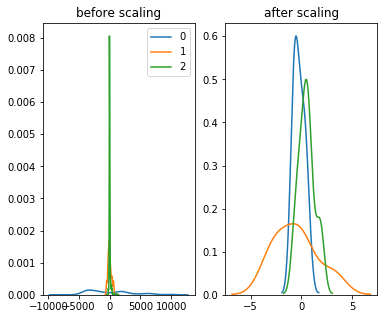

In [65]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title("before scaling")
sns.kdeplot(x1[0],ax=ax1)
sns.kdeplot(x1[1],ax=ax1)
sns.kdeplot(x1[2],ax=ax1)
"sns.kdeplot(x1[3],ax=ax1)"

ax2.set_title("after scaling")
sns.kdeplot(x_train[0],ax=ax2)
sns.kdeplot(x_train[1],ax=ax2)
sns.kdeplot(x_train[2],ax=ax2)
"sns.kdeplot(x_train[3],ax=ax2)"


In [66]:
x2=pd.DataFrame(x_train)

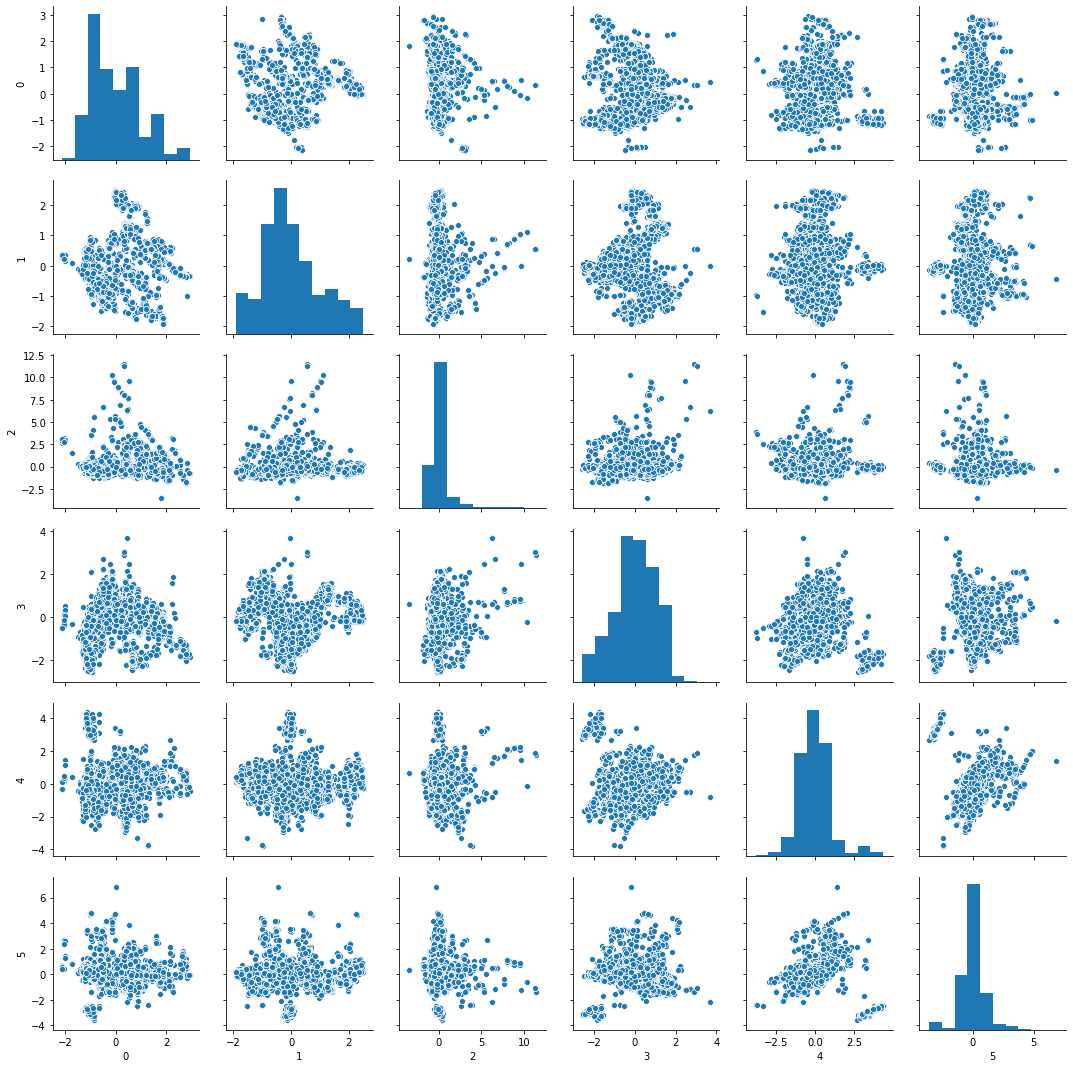

In [67]:
sns.pairplot(x2)

In [68]:
x_train

array([[-0.73675626, -0.66139501, -0.58396146,  0.54292829,  0.24823273,
        -0.12617743],
       [-1.12215124,  0.03633263,  0.26360237, -2.38617957,  3.0771325 ,
        -3.0823095 ],
       [ 0.58094888,  1.85484814, -0.55098887,  0.89886489,  0.39865574,
        -0.01791234],
       ...,
       [-0.33369032, -0.8730212 , -0.24057328,  0.63137371, -0.74898754,
        -0.73207351],
       [-0.2770078 , -0.90974048,  0.60525748,  1.38754666, -0.71660028,
        -1.36649123],
       [ 0.58084611, -0.30344995, -0.41109856, -0.10085737,  1.31873126,
         0.77361428]])

In [69]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(SVR(),param_grid=parameters,scoring='neg_mean_squared_error',cv=5)

In [55]:
grid_search.fit(x_train,y_train)



KeyboardInterrupt: 

In [22]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.9, 'kernel': 'rbf'}

In [42]:
x_train1=x_train

In [70]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold,cross_val_score
import warnings
warnings.filterwarnings("ignore")


In [71]:
models=[]
models.append(("linear regression",LinearRegression()))
#models.append(("SGDRegressor",SGDRegressor()))
models.append(("KNeighborsRegressor",KNeighborsRegressor()))
models.append(("SVR",SVR(kernel='rbf',C=1000,gamma=0.9)))
models.append(("RandomForestRegressor",RandomForestRegressor(max_depth=2)))
models.append(("DecisionTreeRegressor",DecisionTreeRegressor()))
models.append(("Polynomial_regression",LinearRegression()))
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10,random_state=10)
    if (name=='poly'):
        poly_features=PolynomialFeatures(degree=8)
        x_train=poly_features.fit_transform(x_train1)
    cv_resilt=cross_val_score(model,x_train1,y_train,cv=kfold,scoring="neg_mean_squared_error")
    results.append(cv_resilt)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_resilt.mean(),cv_resilt.std())
    print(msg)
    #print(cv_resilt)

linear regression:-160.249293(16.440418)
KNeighborsRegressor:-188.675170(20.123612)
SVR:-216.599661(27.959110)
RandomForestRegressor:-160.630927(16.571219)
DecisionTreeRegressor:-328.194405(30.169510)
Polynomial_regression:-160.249293(16.440418)


In [26]:
import matplotlib.pyplot as plt
errors=[]
ran=range(1,50)
for i in ran:
    knnr=KNeighborsRegressor(n_neighbors=i)
    knnr.fit(x_train,y_train)
    y_pred=knnr.predict(x_test)
    errors.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Text(0, 0.5, 'root mean square error')

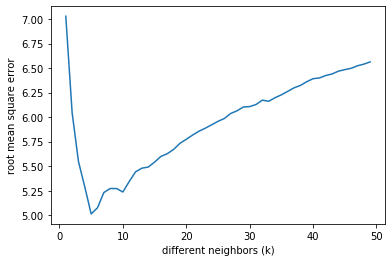

In [27]:
%matplotlib inline
plt.plot(ran,errors)
plt.xlabel("different neighbors (k)")
plt.ylabel("root mean square error")

In [28]:
min(errors)

5.012807779523558

In [29]:
knnr=KNeighborsRegressor(n_neighbors=9)
knnr.fit(x_train,y_train)
y_pred_knn=knnr.predict(x_test)

In [30]:
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
print("r2_score",r2_score(y_test,y_pred_knn))
print("root_mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred_knn)))

r2_score 0.815954497211826
root_mean_squared_error 5.271719116719956


In [58]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'crossvalidation error')

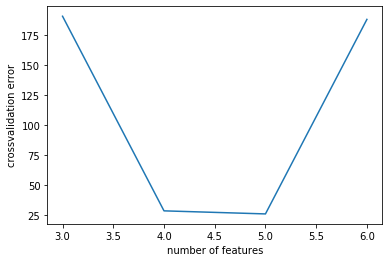

In [75]:
knn=[190.61,28.7,26.15,188]
knn_sd=[15.95,6.9,5.8,20.123]
nc=[3,4,5,6]
plt.plot(nc,knn)
plt.xlabel("number of features")
plt.ylabel("crossvalidation error")

Text(0, 0.5, 'crossvalidation standard deviation')

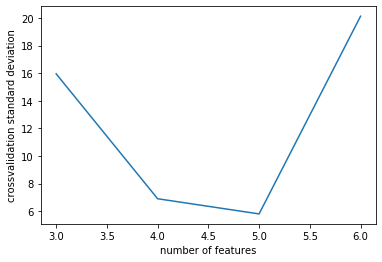

In [77]:
plt.plot(nc,knn_sd)
plt.xlabel("number of features")
plt.ylabel("crossvalidation standard deviation")